<a href="https://colab.research.google.com/github/ia4226/dl_basics/blob/main/digitrecog_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


In [3]:
!pip install  tensorflow
!pip install numpy
!pip install keras
!pip install pillow

In [4]:
num_classes=10
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [5]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
batch_size = 128
num_classes = 10
epochs = 10

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [9]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [10]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

Epoch 1/10
469/469 [==============================] - 174s 364ms/step - loss: 2.2752 - accuracy: 0.1689 - val_loss: 2.2403 - val_accuracy: 0.4265
Epoch 2/10
469/469 [==============================] - 171s 364ms/step - loss: 2.2169 - accuracy: 0.3164 - val_loss: 2.1693 - val_accuracy: 0.5964
Epoch 3/10
469/469 [==============================] - 167s 357ms/step - loss: 2.1414 - accuracy: 0.4330 - val_loss: 2.0692 - val_accuracy: 0.6532
Epoch 4/10
469/469 [==============================] - 165s 352ms/step - loss: 2.0289 - accuracy: 0.5186 - val_loss: 1.9213 - val_accuracy: 0.6943
Epoch 5/10
469/469 [==============================] - 162s 346ms/step - loss: 1.8681 - accuracy: 0.5755 - val_loss: 1.7117 - val_accuracy: 0.7395
Epoch 6/10
469/469 [==============================] - 165s 352ms/step - loss: 1.6554 - accuracy: 0.6209 - val_loss: 1.4511 - val_accuracy: 0.7649
Epoch 7/10
469/469 [==============================] - 165s 351ms/step - loss: 1.4204 - accuracy: 0.6580 - val_loss: 1.1898 -

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7231703400611877
Test accuracy: 0.8330000042915344


313/313 [==============================] - 14s 46ms/step


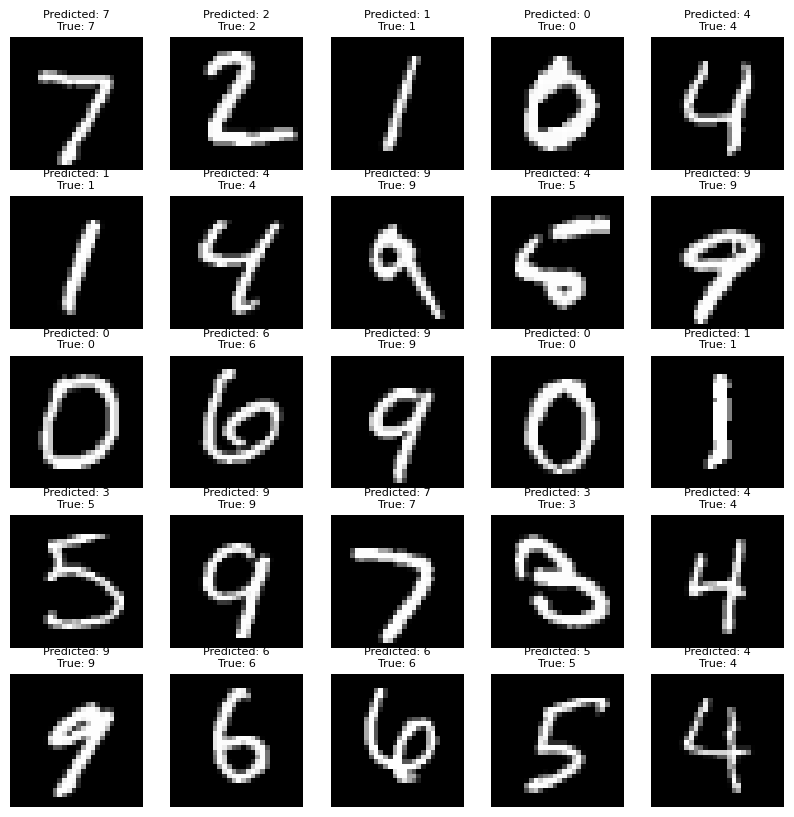

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Making predictions on the test set
predictions = model.predict(x_test)

# Visualizing random test images along with their predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])
    plt.title(f'Predicted: {predicted_label}\nTrue: {true_label}', fontsize=8)
plt.show()
